In [70]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

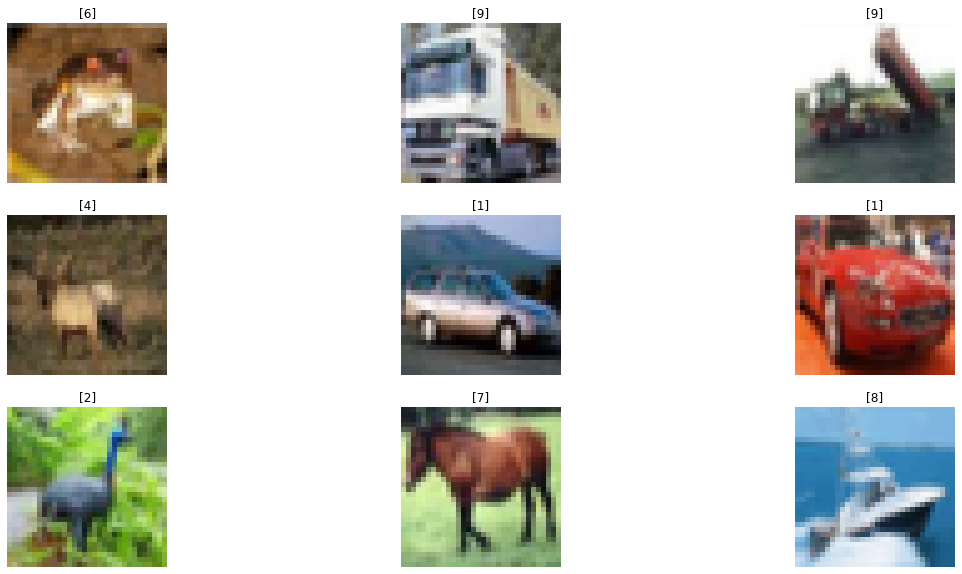

In [71]:
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [73]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [74]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [75]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [76]:
sgd = SGD(lr=0.01, momentum=0.9, decay=(0.01/25), nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)              

In [78]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6761 - accuracy: 0.3926 - val_loss: 1.3917 - val_accuracy: 0.5014
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3095 - accuracy: 0.5296 - val_loss: 1.1679 - val_accuracy: 0.5870
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1483 - accuracy: 0.5916 - val_loss: 1.1164 - val_accuracy: 0.6013
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0238 - accuracy: 0.6364 - val_loss: 1.0343 - val_accuracy: 0.6331
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9284 - accuracy: 0.6716 - val_loss: 0.9998 - val_accuracy: 0.6446
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8465 - accuracy: 0.7003 - val_loss: 0.9506 - val_accuracy: 0.6648
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7768 - accuracy: 0.7251 - val_loss: 0.9092 - val_accuracy:

In [79]:
acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', acc[1])

Test accuracy: 0.7060999870300293


In [80]:
model.save('cifar10_model.h5')

In [84]:
results = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

from PIL import Image
import numpy as np
img = Image.open('test.jpg')
img = img.resize((32, 32))
img = np.array(img)
img = img.astype('float32')
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict_classes(img)[0]
print(pred, results[np.argmax(pred)])

0 airplane


C:\Users\Public\anaconda\envs\deep-learning\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
